In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import gzip
import pandas as pd

In [26]:
def get_data(fitxer):

    file = open(fitxer,'r')
    file_content = file.read()
    file.close()
    data = []
    left_open = []
    right_open = []
    contents = file_content.split("\n")

    for content in contents[:-1]:
        json_content = json.loads(content)
        try:
            dades = {
                'timestamp': json_content['timestamp'],
                'gaze2d': json_content['data']['gaze2d'],
                'gaze3d': json_content['data']['gaze3d'],
                'eyeleft_gazeorigin': json_content['data']['eyeleft']['gazeorigin'],
                'eyeleft_gazedirection': json_content['data']['eyeleft']['gazedirection'],
                'eyeleft_pupildiameter': json_content['data']['eyeleft']['pupildiameter'],
                'eyeright_gazeorigin': json_content['data']['eyeright']['gazeorigin'],
                'eyeright_gazedirection': json_content['data']['eyeright']['gazedirection'],
                'eyeright_pupildiameter': json_content['data']['eyeright']['pupildiameter'],
            }
            if dades['eyeleft'] == {} and dades['eyeright'] != {}:
                left_open.append(0)
                right_open.append(1)
            if dades['eyeright'] == {} and dades['eyeleft'] != {}:
                left_open.append(1)
                right_open.append(0)
            if dades['eyeleft'] == {} and dades['eyeright'] == {}:
                left_open.append(0)
                right_open.append(0)
            if dades['eyeleft'] != {} and dades['eyeright'] != {}:
                left_open.append(1)
                right_open.append(1)

        # DE MOMENT TREURE LES ENTRADES QUE NO TENEN DADES DELS DOS ULLS
        except:       
            # if json_content['data'] == {}:
            #     dades = {
            #         'timestamp': json_content['timestamp'],
            #         'gaze2d': [np.mean([data[-1]['gaze2d'][0], data[-2]['gaze2d'][0], data[-3]['gaze2d'][0]]), np.mean([data[-1]['gaze2d'][1], data[-2]['gaze2d'][1], data[-3]['gaze2d'][1]])] ,
            #         'gaze3d': [np.mean([data[-1]['gaze3d'][0], data[-2]['gaze3d'][0], data[-3]['gaze3d'][0]]), np.mean([data[-1]['gaze3d'][1], data[-2]['gaze3d'][1], data[-3]['gaze3d'][1]]), np.mean([data[-1]['gaze3d'][2], data[-2]['gaze3d'][2], data[-3]['gaze3d'][2]])],
            #         'eyeleft': {},
            #         'eyeright': {}
            #     }
            #     left_open.append(0)
            #     right_open.append(0)
                pass
            # elif json_content['data']['eyeleft'] == {}:
            #     dades = {
            #         'timestamp': json_content['timestamp'],
            #         'gaze2d': [np.mean([data[-1]['gaze2d'][0], data[-2]['gaze2d'][0], data[-3]['gaze2d'][0]]), np.mean([data[-1]['gaze2d'][1], data[-2]['gaze2d'][1], data[-3]['gaze2d'][1]])] ,
            #         'gaze3d': [np.mean([data[-1]['gaze3d'][0], data[-2]['gaze3d'][0], data[-3]['gaze3d'][0]]), np.mean([data[-1]['gaze3d'][1], data[-2]['gaze3d'][1], data[-3]['gaze3d'][1]]), np.mean([data[-1]['gaze3d'][2], data[-2]['gaze3d'][2], data[-3]['gaze3d'][2]])],
            #         'eyeleft': {},
            #         'eyeright': {}
            #     }
            #     left_open.append(1)
            #     right_open.append(0)
            # elif json_content['data']['eyeright'] == {}:
            #     dades = {
            #         'timestamp': json_content['timestamp'],
            #         'gaze2d': [np.mean([data[-1]['gaze2d'][0], data[-2]['gaze2d'][0], data[-3]['gaze2d'][0]]), np.mean([data[-1]['gaze2d'][1], data[-2]['gaze2d'][1], data[-3]['gaze2d'][1]])] ,
            #         'gaze3d': [np.mean([data[-1]['gaze3d'][0], data[-2]['gaze3d'][0], data[-3]['gaze3d'][0]]), np.mean([data[-1]['gaze3d'][1], data[-2]['gaze3d'][1], data[-3]['gaze3d'][1]]), np.mean([data[-1]['gaze3d'][2], data[-2]['gaze3d'][2], data[-3]['gaze3d'][2]])],
            #         'eyeleft': {},
            #         'eyeright': {}
            #     }
            #     left_open.append(0)
            #     right_open.append(1)

        data.append(dades)

    data = pd.DataFrame(data)

    return data

def visualitzar(df):
    
    x_punt = [df['gaze2d'][i][0] for i in range(len(df))]
    y_punt = [1 - df['gaze2d'][i][1] for i in range(len(df))]
    
    return plt.scatter(x_punt, y_punt, s=1)
    

In [47]:
data_1 = get_data('gazedata_brainworkshop')
data_2 = get_data('gazedata_brainworkshop_2')
data_3 = get_data('gazedata_brainworkshop_3')
data_1['Class'] = 0
data_2['Class'] = 1
data_3['Class'] = 2

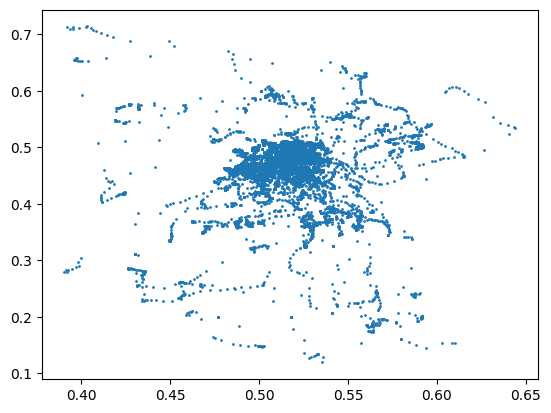

In [43]:
visualitzar(data_2)

Aquí no se si és un error o es que es tancaven molt els ulls

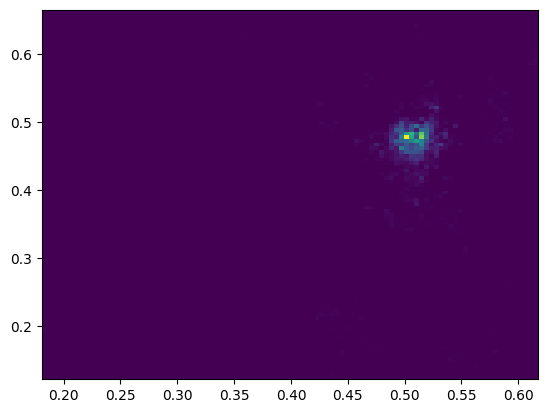

In [50]:
plt.hist2d(x_punt,y_punt, bins=(100,100))
plt.show()

## Mirem les pupile·les

In [51]:
left_pupil = []
right_pupil = []
avg_pupil = 3.52 # És la mitjana en aquest cas

for i in range(len(data)):
    try:
        left_pupil.append(data[i]['eyeleft']['pupildiameter'])
    except:
        try:
            left_pupil.append(np.average([left_pupil[-1], left_pupil[-2], left_pupil[-3]]))
        except:
            left_pupil.append(avg_pupil)
    try:
        right_pupil.append(data[i]['eyeright']['pupildiameter'])
    except:
        try:
            right_pupil.append(np.average([right_pupil[-1], right_pupil[-2], right_pupil[-3]]))
        except:
            right_pupil.append(avg_pupil)

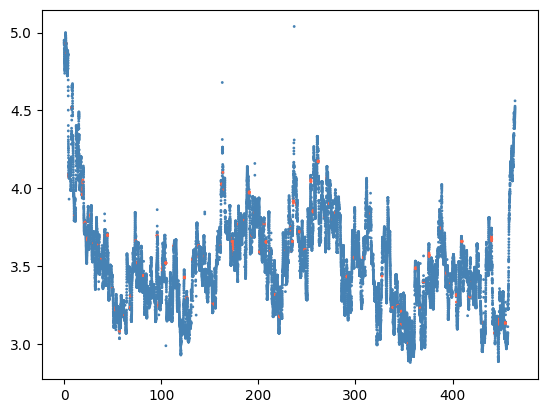

In [52]:
plt.scatter(time,left_pupil,c = colors[left_open], s=1)

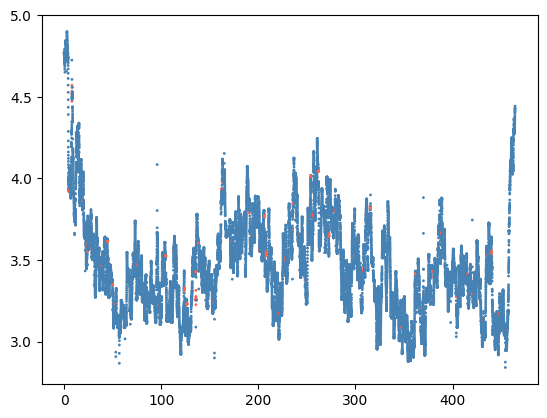

In [53]:
plt.scatter(time,right_pupil, c = colors[right_open],s=1)

## Mirar al semàfor

Miro a veure si s'observa un augment de la pupil·la quan es mira cap al semàfor

In [17]:
index_pupila = []
pupil = (np.array(left_pupil) + np.array(right_pupil))/2

for i in range(len(x_punt)):
    if y_punt[i] > 0.7:
        index_pupila.append(i)

In [21]:
vista_amunt = pupil[index_pupila]
pujant = [] 
for i in range(len(vista_amunt)-1):
    if vista_amunt[i] < vista_amunt[i+1]:
        pujant.append(1)
    else:
        pujant.append(0)


In [24]:
len(vista_amunt)

5109

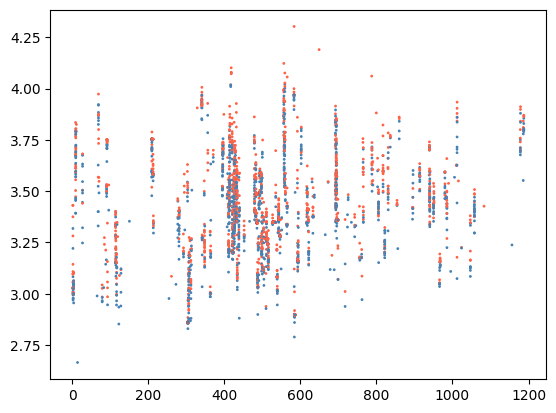

In [26]:
time = np.array(time)

plt.scatter(time[index_pupila][:-1], vista_amunt[:-1],c = colors[pujant], s=1)


In [15]:
# Calculem les distàncies i a veure si quan augmenten també ho fa el tamany de la pupil·la
dist = []
time_d = time[:-1]
for i in range(len(x_punt)-1):
    d = np.sqrt((x_punt[i] - x_punt[i+1])**2 + (y_punt[i] - y_punt[i+1])**2)
    dist.append(d)

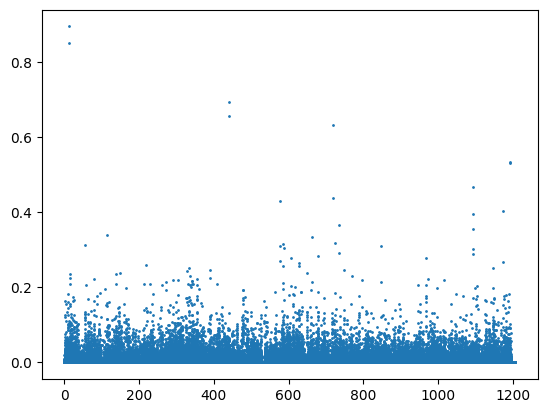

In [16]:
plt.scatter(time_d, dist, s=1)

# FEM LA CLASSIFICACIÓ

Coses a fer:
    
    Feedforward Neural Network (FNN)
    RNN   https://datascience.oneoffcoder.com/rnn-classify-signals.html ,
    LSTM  https://stackoverflow.com/questions/65976493/keras-lstm-multiclass-classification-structure
    Gated Recurrent Unit (GRU) Aquestes dos últimes seran les millors
    DeepLearning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequentials
from tensorflow.keras.layers import Dense